In [11]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

In [26]:
def get_immediate_classifier_dirs(a_dir, only=''):
    if only=='':
        return [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.startswith('r_1_c_')]


In [48]:
def get_avg_abs_recall(classifier_dir):
    #df = pd.read_csv(join(d,'absolute_recall.csv'))
    df = pd.read_csv(join(classifier_dir,'recall','majority','detection_rate.csv'))
    #print(df)
    N = df.shape[0]
    m_rc = df[df['Label']=='Macro Average of Attacks']['Rc'].values[0]
    return m_rc


In [49]:
def get_std_recall(d):
    df = pd.read_csv(join(d,'absolute_recall.csv'))
    N = df.shape[0]
    print( df['Rc'].iloc[:N-1]*100)


In [50]:
a='/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/without_sampling_l/r_1_c_forest_k_5_b_explicit'
a[a.find('r_1_c_')+6:a.find('_k_5_')]

'forest'

In [51]:
def extract_clf_name(d):
    return d[d.find('r_1_c_')+6:d.find('_k_5_')]

In [52]:

def autolabel(ax,rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    max_height = 0
    for rect in rects:
        height = rect.get_height()
        if height > max_height:
            max_height = height
            
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 1),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [61]:
descriptive_names = {'tree':'Decision Tree',
                    'forest':'Random Forest',
                     'cnn': '1D-CNN',
                     'softmax': 'Softmax'
                    }
short_names = {'tree':'ID',
                    'forest':'RF',
                     'cnn': 'CNN',
                     'softmax': 'SMX'
                    }

roots = [#'/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/without_sampling_l',
         '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_10/RPS_SI_10_l',
         '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_1/RPS_SI_100_l',
         '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_0.1/RPS_SI_1000_l'
        ]
classifier_dir = 'r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'
#root = '/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l'
recalls = defaultdict(list)
for root in roots:
    classifier_dirs = get_immediate_classifier_dirs(root)
    print(classifier_dirs)
    classifier_names = [extract_clf_name(d) for d in classifier_dirs]
    for i,name in enumerate(classifier_names): 
        avg_abs_rc = get_avg_abs_recall(classifier_dirs[i])
        recalls[name].append(avg_abs_rc)
print(recalls)


['/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_10/RPS_SI_10_l/r_1_c_softmax_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_10/RPS_SI_10_l/r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_10/RPS_SI_10_l/r_1_c_forest_k_5_b_explicit_n_10_bootstrap_True_mf_auto', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_10/RPS_SI_10_l/r_1_c_tree_k_5_b_explicit']
['/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_1/RPS_SI_100_l/r_1_c_softmax_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_1/RPS_SI_100_l/r_1_c_cnn_k_5_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_1/RPS_SI_100_l/r_1_c_forest_k_5_b_explicit_n_10_bootstrap_True_mf_auto', '/home/juma/data/net_intrusion/CIC-IDS-2018/CSVs/SR_1/RPS_SI_100_l/r_1_c_tree_k_5_b_explicit']
['/home/juma/data/net_intrusion/CIC-IDS-20

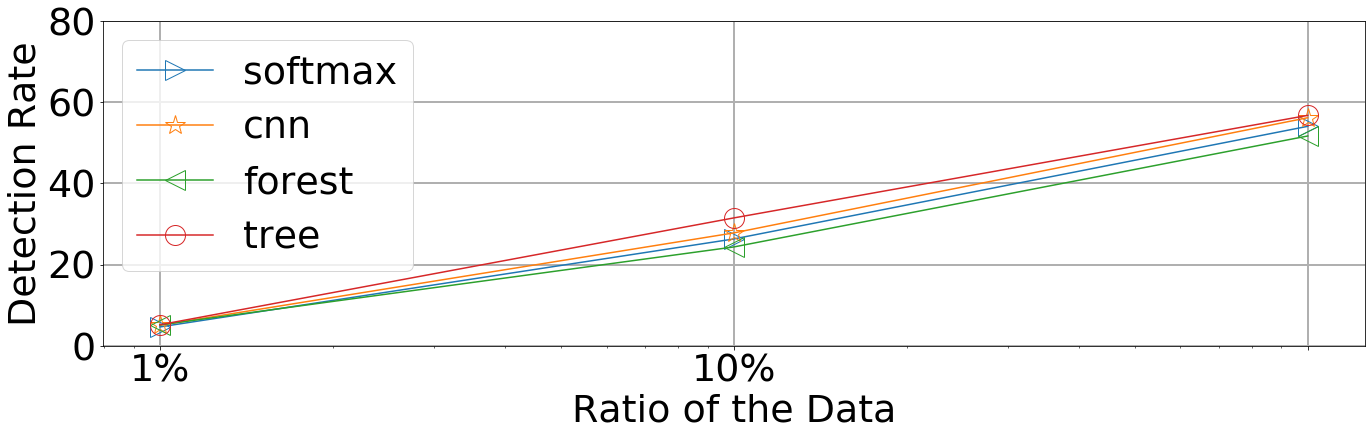

In [85]:

font = {'size'   : 38}
plt.rc('font', **font)
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(20,7))
linestyles = ['go','rv','b<','ms']
markers = ['>','*','<','o','^']
for i,name in enumerate(classifier_names):
    marks_on = [1]
    ax.plot([10,1,0.1],recalls[name],label=classifier_names[i],marker=markers[i],markersize=20,markerfacecolor='none')
plt.grid(linewidth=2)
plt.legend()
plt.ylabel('Detection Rate')
plt.xlabel('Ratio of the Data')
#plt.yscale('log')
plt.xscale('log')
ax.set_xticklabels(['0','0.1%','1%','10%'])
ax.set_ylim(0,80)
fig.tight_layout()
plt.savefig('/home/juma/data/net_intrusion/CIC-IDS-2018/random_sampling_across_sr.png')
plt.show()

No handles with labels found to put in legend.


FileNotFoundError: [Errno 2] No such file or directory: '/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l/random_sampling_across_sr.png'

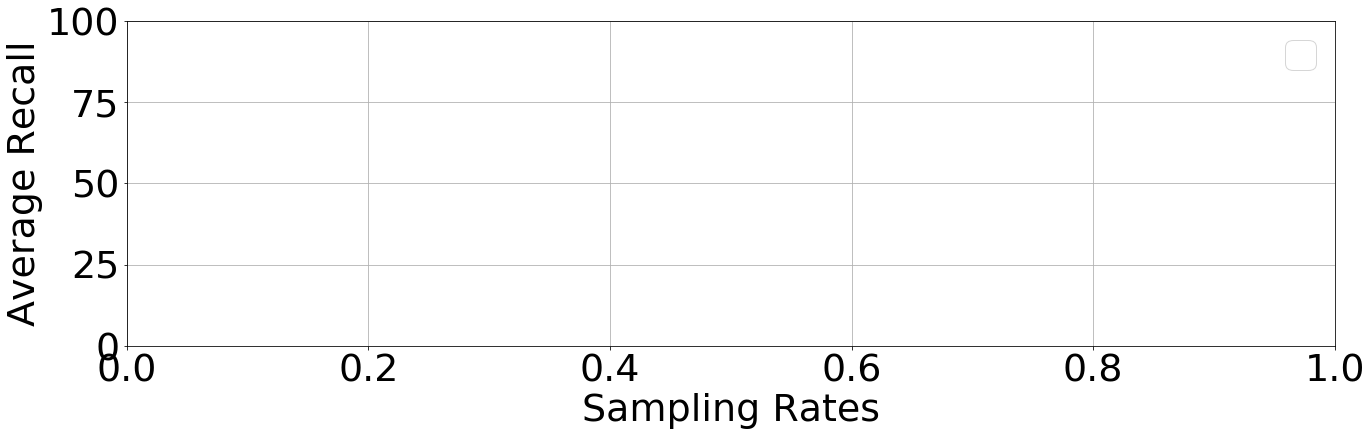

In [46]:
plt.clf()
plt.close()
ind = np.arange(1,21,5)
font = {'size'   : 38}
plt.rc('font', **font)
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(20,7))
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
for i,name in enumerate(short_cls_names):
    rects = ax.bar(-1+ind+i,recalls[name],label=classifier_names[i],width=1,hatch=patterns[i])
    autolabel(ax,rects)
plt.grid()
plt.legend(ncol=2)short_cls_names
plt.ylabel('Average Recall')
plt.xlabel('Sampling Rates')
#plt.yscale('log')
ax.set_ylim(0,100)
#ax.set_xticklabels(['0','100%','','10%','','1%','','0.1%'])
fig.tight_layout()
plt.savefig('/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l/random_sampling_across_sr.png')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

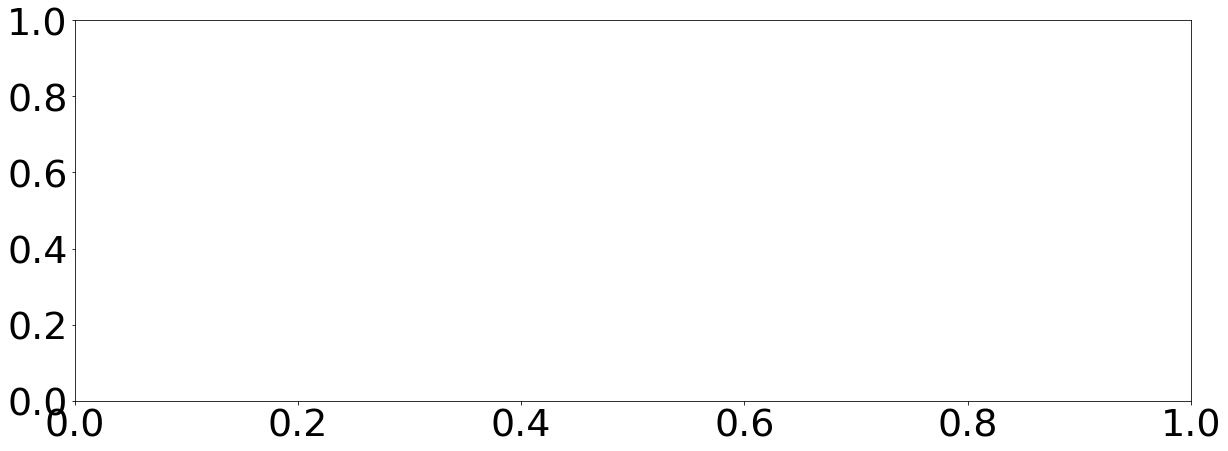

In [101]:
ind = np.arange(4)
font = {'size'   : 38}
plt.rc('font', **font)
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(20,7))
linestyles = ['go','rv','b<','ms']
markers = ['>','*','<','o','^']
for i,name in enumerate(short_cls_names):
    marks_on = [1]
    ax.plot(ind,recalls[name],label=classifier_names[i],linewidth=3,marker=markers[i],markersize=20,markerfacecolor='none')
plt.grid()
plt.legend()
plt.ylabel('Average Recall')
plt.xlabel('Sampling Rates')
#plt.yscale('log')
ax.set_xticklabels(['0','100%','','10%','','1%','','0.1%'])
fig.tight_layout()
plt.savefig('/home/juma/data/net_intrusion/CIC-IDS-2018/whole_l/random_sampling_across_sr.png')
plt.show()

In [102]:
77.46/28.5

2.717894736842105

In [139]:
77.46/12.85

6.0280155642023345

In [140]:
77.46/6.22

12.45337620578778

In [141]:
28.5/12.85

2.217898832684825

In [145]:
12.85/6.22

2.0659163987138265

In [146]:
100/18.15

5.5096418732782375

In [ ]:
5.5

In [143]:
18.15/3.11

5.836012861736334

In [144]:
3.11/0.45

6.9111111111111105

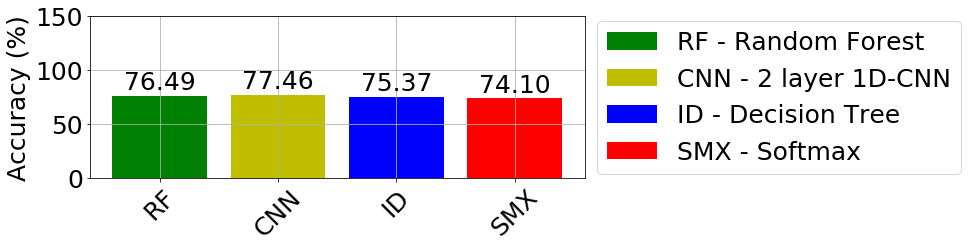

In [72]:
descriptive_names = {'tree':'Decision Tree',
                    'forest':'Random Forest',
                     'cnn': '2 layer 1D-CNN',
                     'softmax': 'Softmax'
                    }
short_names = {'tree':'ID',
                    'forest':'RF',
                     'cnn': 'CNN',
                     'softmax': 'SMX'
                    }

classifier_dirs = get_immediate_subdirs(root)
avg_abs_rcs = [get_avg_abs_recall(d) for d in classifier_dirs]
classifier_names = [descriptive_names[ntpath.split(d)[1][:-4]] for d in classifier_dirs]
short_cls_names = [short_names[ntpath.split(d)[1][:-4]] for d in classifier_dirs]
ind = [i for i in np.arange(len(avg_abs_rcs))]
colors = ['g','y','b','r','m','orange']

font = {
        'size'   : 25}
rcParams['font.family'] = 'normal'

plt.rc('font', **font)
plt.clf()
plt.close()
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,4))
for i,name in enumerate(classifier_names):                       
    rects = ax.bar(ind[i],avg_abs_rcs[i],color=colors[i],label=short_cls_names[i] + ' - ' + classifier_names[i])
    autolabel(ax,rects)
ax.set_ylim(0,150)
ax.set_xticks(ind)
ax.set_xticklabels(short_cls_names,rotation=45)
ax.set_ylabel('Accuracy (%)')

plt.grid()
plt.legend(bbox_to_anchor=(1., 1.05))
plt.tight_layout()
plt.savefig(join(root,'comparision.png'))
plt.show()
